In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc
%matplotlib inline

In [54]:
conn = pyodbc.connect(r"driver={SQL SERVER};server=LAPTOP-V88UBQAA\SQLSERVERVINCENT;database=AdventureWorks2016;trusted_connection=YES;")
conx_string = "driver={SQL SERVER};server=LAPTOP-V88UBQAA\SQLSERVERVINCENT;database=AdventureWorks2016;trusted_connection=YES;"
query2 = "SELECT TOP (1000) [PRS_START_TIME],[PRS_END_TIME],[PRS_STATE],[PRS_BUSINESS_KEY],try_convert(float, RIGHT(PRS_Business_key, len(PRS_BUSINESS_KEY) - charindex(':', prs_business_key))) as Business_Key, try_convert(float, DATEDIFF(MILLISECOND, PRS_START_TIME,PRS_END_TIME)) as Process_Time FROM [ORCHESTRA].[dbo].[ORC_PROCESS_STATE];"
SQLquery = pd.read_sql_query(query2, conn)
conx = pyodbc.connect(conx_string);
cursor = conx.cursor();
cursor.execute(query2);
data = cursor.fetchall()

In [55]:
df = pd.DataFrame(SQLquery, columns=['PRS_START_TIME','PRS_END_TIME','PRS_STATE','Business_Key', 'Process_Time'])

In [56]:
df.head(20)

,PRS_START_TIME,PRS_END_TIME,PRS_STATE,Business_Key,Process_Time
0,2021-08-11 13:31:16.600,2021-08-11 13:31:24.687,9.0,0.868326,8086.0
1,2021-08-11 13:31:36.573,2021-08-11 13:31:44.613,9.0,0.889375,8040.0
2,2021-08-11 13:32:36.583,2021-08-11 13:32:44.660,9.0,0.968228,8077.0
3,2021-08-11 13:34:16.583,2021-08-11 13:34:24.677,9.0,0.868139,8093.0
4,2021-08-11 13:34:36.583,2021-08-11 13:34:44.643,9.0,0.958527,8060.0
5,2021-08-11 13:35:06.577,2021-08-11 13:35:14.670,9.0,0.898868,8094.0
6,2021-08-11 13:36:26.573,2021-08-11 13:36:34.647,9.0,0.817538,8073.0
7,2021-08-11 13:37:16.577,2021-08-11 13:37:24.637,9.0,0.805893,8060.0
8,2021-08-11 13:37:46.567,2021-08-11 13:37:54.627,9.0,0.936005,8060.0
9,2021-08-11 13:40:16.567,2021-08-11 13:40:24.623,9.0,0.816041,8057.0


In [57]:
df.describe()

,PRS_STATE,Business_Key,Process_Time
count,323.000000,323.000000,3.230000e+02
mean,4.801858,0.563887,4.896317e+04
std,2.754623,0.292673,7.710789e+05
min,3.000000,0.001954,3.700000e+01
25%,3.000000,0.311733,4.265000e+03
50%,3.000000,0.598368,7.050000e+03
75%,9.000000,0.826114,8.057000e+03
max,9.000000,0.995729,1.386396e+07


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   PRS_START_TIME  323 non-null    datetime64[ns]
 1   PRS_END_TIME    323 non-null    datetime64[ns]
 2   PRS_STATE       323 non-null    float64       
 3   Business_Key    323 non-null    float64       
 4   Process_Time    323 non-null    float64       
dtypes: datetime64[ns](2), float64(3)
memory usage: 12.7 KB


In [59]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

In [60]:
df = df.drop(31, axis=0)

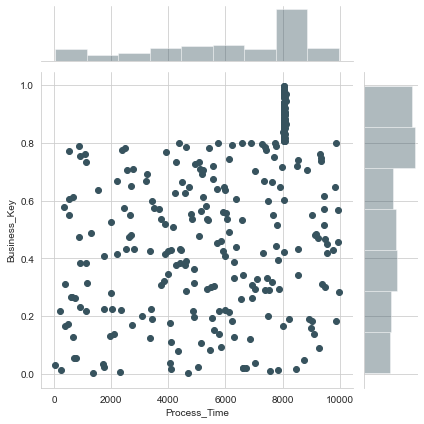

In [61]:
sns.jointplot(x='Process_Time',y='Business_Key',data=df)

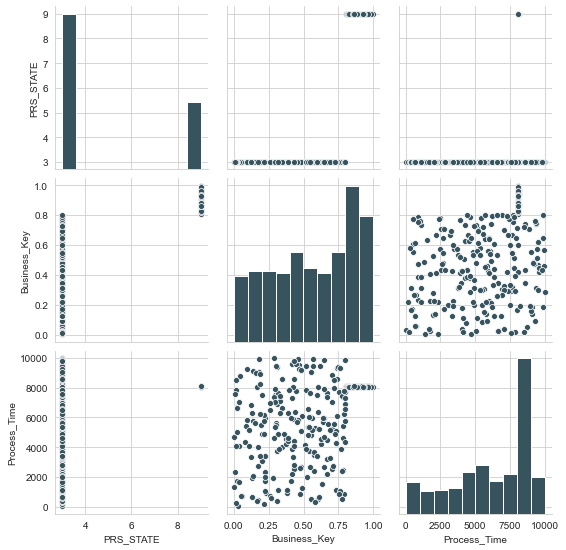

In [62]:
sns.pairplot(df)

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
y = df['PRS_STATE']
X = df[['Business_Key', 'Process_Time']]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [68]:
predictions = dtree.predict(X_test)
predictions

array([3., 3., 3., 9., 3., 3., 9., 9., 3., 3., 3., 9., 9., 9., 3., 9., 3.,
       3., 9., 9., 3., 3., 3., 9., 9., 3., 3., 3., 3., 9., 3., 3., 3., 3.,
       9., 3., 3., 3., 3., 9., 3., 3., 9., 3., 9., 3., 3., 9., 9., 9., 9.,
       3., 9., 3., 3., 3., 3., 9., 3., 3., 3., 3., 3., 3., 3., 3., 3., 9.,
       3., 3., 3., 3., 3., 9., 3., 3., 3., 9., 9., 9., 3., 3., 3., 3., 3.,
       3., 9., 9., 3., 3., 9., 3., 3., 9., 3., 3., 3.])

In [69]:
from sklearn.metrics import classification_report,confusion_matrix

In [70]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         3.0       1.00      1.00      1.00        66
         9.0       1.00      1.00      1.00        31

    accuracy                           1.00        97
   macro avg       1.00      1.00      1.00        97
weighted avg       1.00      1.00      1.00        97



[[66  0]
 [ 0 31]]


In [77]:
y_all = dtree.predict(X)

df['pred'] = y_all
df.head(100)

,PRS_START_TIME,PRS_END_TIME,PRS_STATE,Business_Key,Process_Time,pred
0,2021-08-11 13:31:16.600,2021-08-11 13:31:24.687,9.0,0.868326,8086.0,9.0
1,2021-08-11 13:31:36.573,2021-08-11 13:31:44.613,9.0,0.889375,8040.0,9.0
2,2021-08-11 13:32:36.583,2021-08-11 13:32:44.660,9.0,0.968228,8077.0,9.0
3,2021-08-11 13:34:16.583,2021-08-11 13:34:24.677,9.0,0.868139,8093.0,9.0
4,2021-08-11 13:34:36.583,2021-08-11 13:34:44.643,9.0,0.958527,8060.0,9.0
...,...,...,...,...,...,...
96,2021-08-11 17:59:00.543,2021-08-11 17:59:08.243,3.0,0.752130,7700.0,3.0
97,2021-08-11 17:59:10.557,2021-08-11 17:59:16.483,3.0,0.558908,5927.0,3.0
98,2021-08-11 17:59:20.547,2021-08-11 17:59:28.603,9.0,0.973905,8057.0,9.0
99,2021-08-11 17:59:30.547,2021-08-11 17:59:35.110,3.0,0.627334,4564.0,3.0


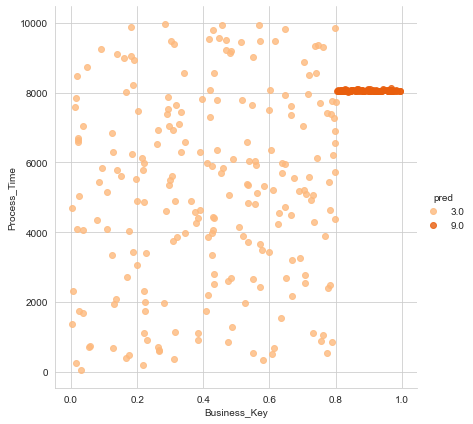

In [88]:
#Visualize prediction results with hue='pred'
sns.set_style('whitegrid')
sns.lmplot('Business_Key','Process_Time',data=df, hue='pred',
           palette='Oranges',height=6,aspect=1,fit_reg=False)

In [89]:
%pip install graphviz
    
%pip install pydot

%pip install six

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [90]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df[['Business_Key', 'Process_Time']])
features

['Business_Key', 'Process_Time']

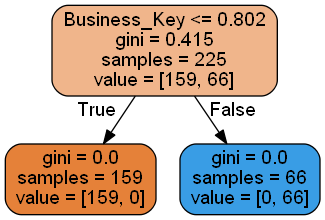

In [91]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

In [92]:
##Random Forrest
from sklearn.ensemble import RandomForestClassifier

In [93]:
rfc = RandomForestClassifier(n_estimators=100)

In [94]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [95]:
rfc_pred = rfc.predict(X_test)
rfc_pred

array([3., 3., 3., 9., 3., 3., 9., 9., 3., 3., 3., 9., 9., 9., 3., 9., 3.,
       3., 9., 9., 3., 3., 3., 9., 9., 3., 3., 3., 3., 9., 3., 3., 3., 3.,
       9., 3., 3., 3., 3., 9., 3., 3., 9., 3., 9., 3., 3., 9., 9., 9., 9.,
       3., 9., 3., 3., 3., 3., 9., 3., 3., 3., 3., 3., 3., 3., 3., 3., 9.,
       3., 3., 3., 3., 3., 9., 3., 3., 3., 9., 9., 9., 3., 3., 3., 3., 3.,
       3., 9., 9., 3., 3., 9., 3., 3., 9., 3., 3., 3.])

In [96]:
print(classification_report(y_test,rfc_pred))
print('\n')
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

         3.0       1.00      1.00      1.00        66
         9.0       1.00      1.00      1.00        31

    accuracy                           1.00        97
   macro avg       1.00      1.00      1.00        97
weighted avg       1.00      1.00      1.00        97



[[66  0]
 [ 0 31]]
